In [1]:
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
from tensorflow import keras
from keras.datasets import mnist
fashion_mnist = keras.datasets.fashion_mnist

Using TensorFlow backend.


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

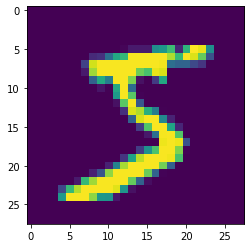

In [4]:
plt.imshow(x_train[0])

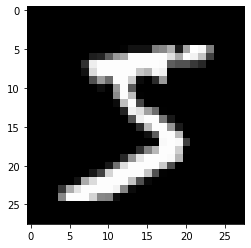

In [5]:
plt.imshow(x_train[0], cmap="gray")

In [6]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


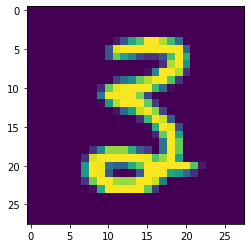

In [7]:
i=random.randint(1, 6000)
plt.imshow(x_train[i])

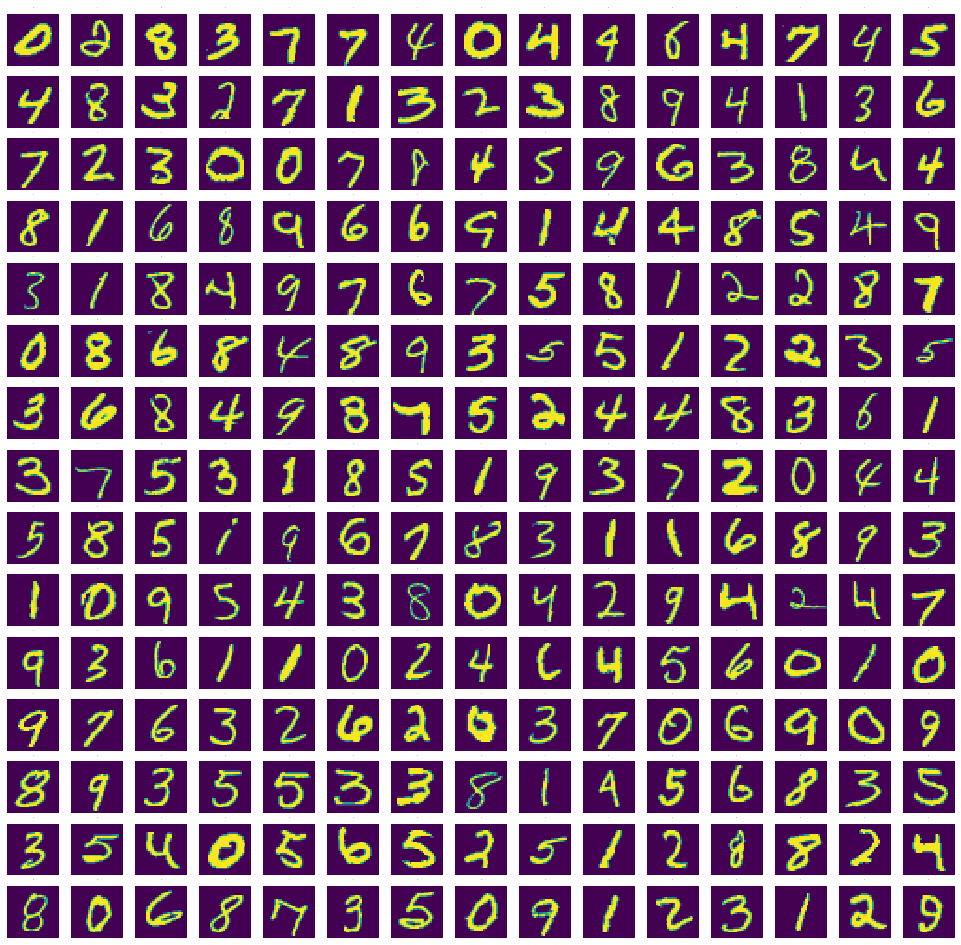

In [8]:
w_grid=15
l_grid=15
fig, axes = plt.subplots(l_grid, w_grid, figsize=(17,17))
axes = axes.ravel()
n_training=len(x_train)

for i in np.arange(0, w_grid*l_grid):
    index=np.random.randint(0, n_training)
    axes[i].imshow(x_train[index])
    axes[i].set_title(y_train[index], fontsize=0)
    axes[i].axis("off")

In [9]:
x_train=x_train/255
x_test=x_test/255

In [10]:
x_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [11]:
noisy_fector = 0.3
noisy_dataset= []

for img in x_train:
    noisy_image = img + noisy_fector*np.random.randn(*img.shape)
    noisy_image=np.clip(noisy_image, 0, 1)
    noisy_dataset.append(noisy_image)

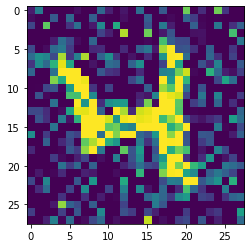

In [12]:
plt.imshow(noisy_dataset[20])

In [13]:
noisy_fector = 0.3
test_noisy_dataset= []

for img in x_test:
    noisy_image = img + noisy_fector*np.random.randn(*img.shape)
    noisy_image=np.clip(noisy_image, 0, 1)
    test_noisy_dataset.append(noisy_image)

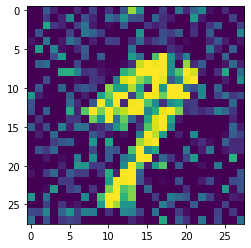

In [14]:
plt.imshow(test_noisy_dataset[20])

In [34]:
noisy_dataset=np.array(noisy_dataset)
test_noisy_dataset=np.array(test_noisy_dataset)

In [35]:
autoencoder=tf.keras.models.Sequential()

#Encoding
autoencoder.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, strides =2, padding ="same", input_shape=(28,28,1)))

autoencoder.add(tf.keras.layers.Conv2D(filters=8, kernel_size=3, strides =2, padding ="same"))

autoencoder.add(tf.keras.layers.Conv2D(filters=8, kernel_size=3, strides =1, padding ="same"))

#Decoding
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters=16, kernel_size=3, strides =2, padding ="same"))                                       
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=3, strides =2, activation="sigmoid", padding ="same"))                            

In [36]:
autoencoder.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(lr=0.001))
autoencoder.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 7, 7, 8)           1160      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
conv2d_transpose_5 (Conv2DTr (None, 14, 14, 16)        1168      
_________________________________________________________________
conv2d_transpose_6 (Conv2DTr (None, 28, 28, 1)         145       
Total params: 3,217
Trainable params: 3,217
Non-trainable params: 0
_________________________________________________________________


In [37]:
autoencoder.fit(noisy_dataset.reshape(-1, 28, 28, 1),
               x_train.reshape(-1, 28, 28, 1),
               epochs=10,
               batch_size=200,
               validation_data=(test_noisy_dataset.reshape(-1, 28, 28, 1),
               x_test.reshape(-1, 28, 28, 1)))

Epoch 1/10
300/300 [==============================] - 30s 100ms/step - loss: 0.2622 - val_loss: 0.1137
Epoch 2/10
300/300 [==============================] - 29s 96ms/step - loss: 0.1018 - val_loss: 0.0939
Epoch 3/10
300/300 [==============================] - 24s 81ms/step - loss: 0.0929 - val_loss: 0.0901
Epoch 4/10
300/300 [==============================] - 26s 86ms/step - loss: 0.0902 - val_loss: 0.0883
Epoch 5/10
300/300 [==============================] - 27s 91ms/step - loss: 0.0889 - val_loss: 0.0875
Epoch 6/10
300/300 [==============================] - 30s 99ms/step - loss: 0.0881 - val_loss: 0.0868
Epoch 7/10
300/300 [==============================] - 28s 95ms/step - loss: 0.0875 - val_loss: 0.0863
Epoch 8/10
300/300 [==============================] - 25s 83ms/step - loss: 0.0871 - val_loss: 0.0860
Epoch 9/10
300/300 [==============================] - 26s 88ms/step - loss: 0.0868 - val_loss: 0.0858
Epoch 10/10
300/300 [==============================] - 25s 84ms/step - loss: 0.08

In [38]:
evaluation=autoencoder.evaluate(test_noisy_dataset.reshape(-1, 28, 28, 1), x_test.reshape(-1, 28, 28, 1))
print("Test Accuracy : {:.3f}".format(evaluation))

313/313 [==============================] - 3s 10ms/step - loss: 0.0856
Test Accuracy : 0.086


In [39]:
predicted=autoencoder.predict(test_noisy_dataset[:10].reshape(-1, 28, 28, 1))

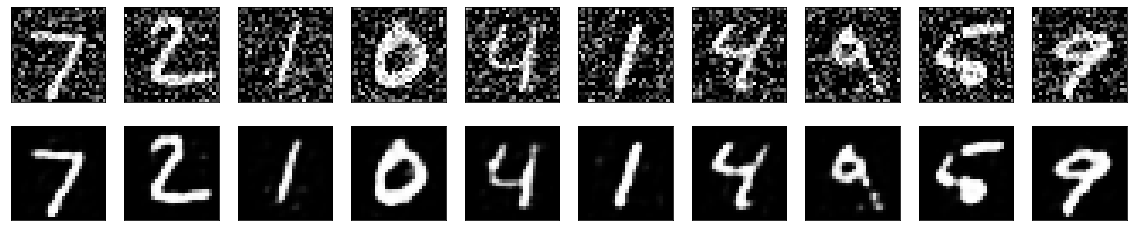

In [43]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
for images, row in zip([test_noisy_dataset[:10], predicted], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape(28, 28), cmap="Greys_r")
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)